In [1]:
# Import required library
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import itertools

# sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn import cluster
from sklearn.metrics import f1_score

# scipy libraries
from scipy import stats

In [3]:
# Load in csv with labels
file_path = "train.csv"
df = pd.read_csv(file_path, usecols=[1,2], header=0, names=["uid", "class"])

print(df)

           uid  class
0    FFDPO1095      1
1    VBGHGG990      0
2    QAGOFY895      1
3    CLKIEM667      1
4    DQALNF634      0
..         ...    ...
422  NXKYZA785      0
423  VTESHP976      1
424  ASSDSL378      2
425  NAWQM1097      1
426  XWBFGT143      4

[427 rows x 2 columns]


### Data Exploration Section

In [4]:
# Explore class distribution
class_dist = df["class"].value_counts()
print(class_dist)

# Calculate class frequencies
class_freq = (np.bincount(df["class"])) / len(df) * 100
print(class_freq)

0    159
4    109
3     78
1     54
2     27
Name: class, dtype: int64
[37.23653396 12.64637002  6.32318501 18.26697892 25.52693208]


In [5]:
def get_features(uid):
    # Set file path using uid
    file_path = f"data-10/{uid}.csv"
    
    # Open csv
    csv_df = pd.read_csv(file_path, header=None)

    # Return as a Python list
    return csv_df.iloc[0].values.tolist()

In [6]:
# Get img features in a single df
features = df[["uid"]].apply(lambda row: get_features(row[0]), axis=1, result_type="expand")

In [7]:
# Get number of cols
num_features = len(features.columns)

# Set column names (features): f0000, f0001, f0002, ... f1024
col_names = [f"f{index:04d}" for index in range(num_features)]

# Rename columns to identify features
features.columns=col_names

# Create final df with all img features
features_df = pd.concat([df, features], axis=1)
features_df.to_csv("all_features.csv")

display(features_df)

,uid,class,f0000,f0001,f0002,f0003,f0004,f0005,f0006,f0007,...,f1014,f1015,f1016,f1017,f1018,f1019,f1020,f1021,f1022,f1023
0,FFDPO1095,1,0.000435,0.004835,0.001156,0.001631,-0.071953,-0.524394,0.000970,-0.001261,...,-0.641628,0.159471,-0.184401,0.759317,0.817270,0.262474,-1.294333,2.773050,0.025298,-0.361512
1,VBGHGG990,0,0.000490,0.002811,-0.002810,0.003657,-0.100906,0.102499,0.000837,0.002280,...,1.163598,-1.340315,-1.077881,-0.480608,-1.065475,0.179071,-0.526653,2.853807,-0.303671,-1.508515
2,QAGOFY895,1,0.000521,0.005383,0.001926,0.000966,-0.115129,-0.382085,0.000861,-0.000747,...,-0.349730,2.244268,-0.113483,0.759855,0.497908,-0.596100,-1.273147,0.710295,1.337171,-0.479146
3,CLKIEM667,1,0.000262,0.006111,0.000615,0.001377,-0.076737,-0.503232,0.000929,-0.002138,...,-0.188307,0.638294,-0.210363,1.003495,-0.008541,0.340108,-0.457311,0.899629,1.973452,-0.684340
4,DQALNF634,0,0.000118,0.003550,-0.002475,0.003005,-0.069995,-0.016384,0.000791,0.000333,...,-0.157696,-0.190375,-0.816606,-0.321006,1.516188,-0.243600,-0.758915,2.071124,0.243026,-0.237539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422,NXKYZA785,0,0.000337,0.005432,-0.000475,0.002062,-0.062630,-0.335225,0.001053,-0.000508,...,-0.925735,-0.220692,-0.497202,0.866598,-0.476684,0.006773,-1.086358,1.150124,0.299896,-0.483027
423,VTESHP976,1,0.000134,0.001271,-0.001821,0.002288,-0.096010,0.109969,0.000575,0.000350,...,-0.192077,-0.497153,-0.775131,-0.504023,1.749616,0.181102,-0.108704,1.030581,-0.077668,-0.615002
424,ASSDSL378,2,0.000141,0.003483,0.001503,0.001356,-0.093397,-0.266861,0.000748,-0.001621,...,-1.539678,-0.149555,-0.598009,0.750183,0.136275,1.332982,-1.210167,2.557617,0.240068,-1.049251
425,NAWQM1097,1,0.000433,0.006901,-0.001123,0.002094,-0.109886,-0.074557,0.000897,0.001525,...,3.011668,-1.444180,-0.119214,0.358852,-1.014500,-0.489160,-1.343841,0.459174,0.971992,-1.581156


- Use interpretability / feature importance packages from Azure machine learning
- Use linear discriminant analysis to convert multi-dimensional feature space into 2d
- Plot boxplots

In [8]:
# Make box plots
def make_boxplots(feature_name, output_folder="plots/boxplot"):
    # Create plot
    plt.boxplot([
        features_df[feature_name].loc[features_df["class"]==0], 
        features_df[feature_name].loc[features_df["class"]==1],
        features_df[feature_name].loc[features_df["class"]==2], 
        features_df[feature_name].loc[features_df["class"]==3],
        features_df[feature_name].loc[features_df["class"]==4]
        ])
    plt.title(feature_name)
    plt.xlabel("Class")
    plt.ylabel("Feature Value")

    # Save figure
    plt.savefig(f"{output_folder}/{feature_name}.png")
    plt.close()

FileNotFoundError: [Errno 2] No such file or directory: 'plots/boxplot/f0000.png'

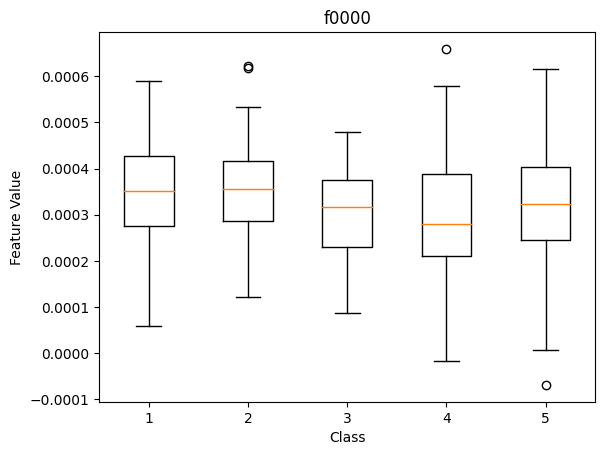

In [9]:
# Loop over each feature and create boxplot
for feature in col_names:
    make_boxplots(feature)

### Train/Test Split Section

Try different ways of splitting the data

1. 70/30 train/test
2. 70/30 train/test stratified
3. 80/20 train/test
4. 80/20 train/test stratified
5. k-fold cross-validation, k=5
6. k-fold cross-validation, k=8
7. k-fold cross-validation, k=10
8. k-fold cross-validation, k=12

Last 4 approaches to be implemented in testing section.

In [10]:
# 1. 70/30 train/test split
X_train1, X_test1, y_train1, y_test1 = train_test_split(
    features_df[col_names], 
    features_df["class"],
    test_size=0.30, random_state=10
)

# Get number of samples from each class in train and test subsets
train_count1 = y_train1.value_counts()
print(f"Training subset:\n{train_count1}")

test_count1 = y_test1.value_counts()
print(f"Testing subset:\n{test_count1}")

Training subset:
0    107
4     71
3     63
1     42
2     15
Name: class, dtype: int64
Testing subset:
0    52
4    38
3    15
2    12
1    12
Name: class, dtype: int64


In [11]:
# 2. 70/30 train/test stratified split
# Use sklearn train_test_split function
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    features_df[col_names], 
    features_df["class"],
    test_size=0.30, random_state=10, stratify=features_df["class"]
)

# Get number of samples from each class in train and test subsets
train_count2 = y_train2.value_counts()
print(f"Training subset:\n{train_count2}")

test_count2 = y_test2.value_counts()
print(f"Testing subset:\n{test_count2}")

Training subset:
0    111
4     76
3     54
1     38
2     19
Name: class, dtype: int64
Testing subset:
0    48
4    33
3    24
1    16
2     8
Name: class, dtype: int64


In [12]:
# 3. 80/20 train/test split
X_train3, X_test3, y_train3, y_test3 = train_test_split(
    features_df[col_names], 
    features_df["class"],
    test_size=0.20, random_state=10
)

# Get number of samples from each class in train and test subsets
train_count3 = y_train3.value_counts()
print(f"Training subset:\n{train_count1}")

test_count3 = y_test1.value_counts()
print(f"Testing subset:\n{test_count3}")

Training subset:
0    107
4     71
3     63
1     42
2     15
Name: class, dtype: int64
Testing subset:
0    52
4    38
3    15
2    12
1    12
Name: class, dtype: int64


In [13]:
# 4. 80/20 stratified split
# Use sklearn train_test_split function
X_train4, X_test4, y_train4, y_test4 = train_test_split(
    features_df[col_names], 
    features_df["class"],
    test_size=0.30, random_state=10, stratify=features_df["class"]
)

# Get number of samples from each class in train and test subsets
train_count4 = y_train4.value_counts()
print(f"Training subset:\n{train_count4}")

test_count4 = y_test4.value_counts()
print(f"Testing subset:\n{test_count4}")

Training subset:
0    111
4     76
3     54
1     38
2     19
Name: class, dtype: int64
Testing subset:
0    48
4    33
3    24
1    16
2     8
Name: class, dtype: int64


### Outlier Removal Section

Use fast.ai to remove bad training data: https://towardsdatascience.com/targeting-and-removing-bad-training-data-8ccdac5e7cc3#1570

### Feature Selection Section

1. Try linear discriminant analysis to reduce dimensionality of problem

2. Try the following clustering techniques:
    - K-means (partitional clustering, no overlap between groups)
    - Hierarchical clustering (produces interpretable dendrograms)
    - Density-based clustering (assign cluster where there are high densities of data points separated by low density regions)
    
    Source: https://realpython.com/k-means-clustering-python/

3. Look at correlation between features and understand if we can use it to identify useful features. If two features are highly correlated, we aren't gaining any new information - can remove one.

In [14]:
# Linear Discriminant Analysis to reduce dimensionality of problem
lda_clf = LinearDiscriminantAnalysis()
lda_model = lda_clf.fit(features_df[col_names], features_df["class"])
lda_transform = lda_model.transform(features_df[col_names])

[(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]

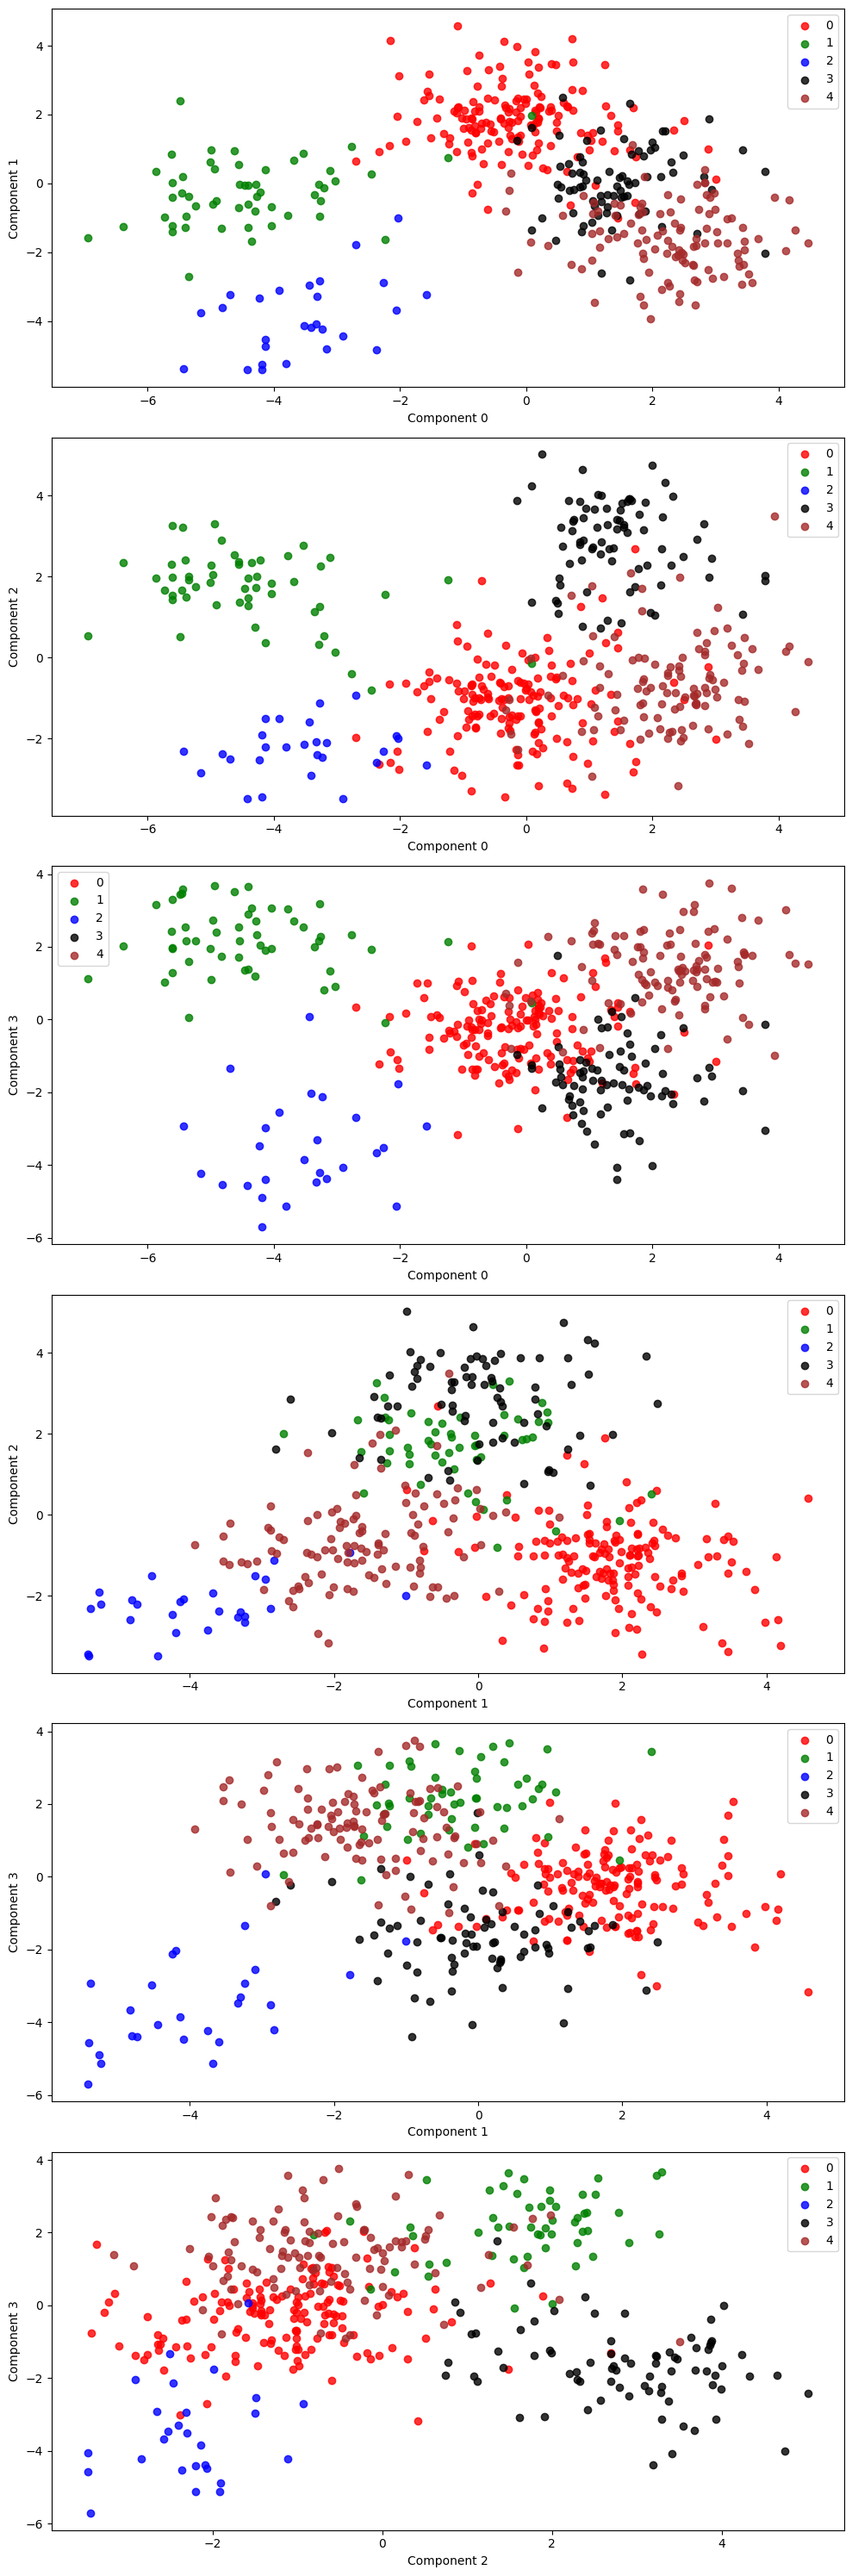

In [16]:
# Visualize LDA results
target_class = np.unique(features_df["class"])
colors = ["red", "green", "blue", "black", "brown"]
# Get number of components
n_components = lda_transform.shape[1]
pairs = []
for xi in range(n_components):
    for yi in range(n_components):
        if yi > xi:
            pairs.append((xi,yi))

# Setup subplots
fig, ax = plt.subplots(len(pairs), 1, figsize=(10,30))
# Get every combination of LDA components
# Setting up all values to plot
for ax_i,(xi,yi) in enumerate(pairs):
    # Plot data
    for color, i, c in zip(colors, [0,1,2,3,4], target_class):
        ax[ax_i].scatter(lda_transform[features_df["class"] == i, xi],
            lda_transform[features_df["class"] == i, yi],
            alpha=.8, color=color, label=c)
    
    # Add legend
    ax[ax_i].set_xlabel(f"Component {xi}")
    ax[ax_i].set_ylabel(f"Component {yi}")
    ax[ax_i].legend(loc="best")

# Set title on the plot
#plt.title("Linear Discriminant Analysis")
plt.tight_layout()

### Emma Added
Created new dataframe with columns as class, comp0, comp2

In [51]:
import more_itertools
cols = ["Class", "Comp1", "Comp2"]
df_components = pd.DataFrame(columns = cols)

for i in range(5):
    col1 = list(more_itertools.collapse(features_df.loc[features_df["class"] == i]["class"]))
    col2 = list(more_itertools.collapse(lda_transform[features_df["class"] == i, 0]))
    col3 = list(more_itertools.collapse(lda_transform[features_df["class"] == i, 2]))
    new_df = pd.DataFrame(columns = cols)
    new_df["Class"] = col1
    new_df["Comp1"] = col2
    new_df["Comp2"] = col3
    df_components = pd.concat([df_components, new_df])

df_components = df_components.reset_index(drop=True)    
display(df_components)

,Class,Comp1,Comp2
0,0,-0.289508,-0.996760
1,0,-0.864316,-1.435031
2,0,0.381038,-0.453794
3,0,0.048794,-1.028781
4,0,-0.555619,-0.468080
...,...,...,...
422,4,0.867771,-1.819452
423,4,2.650862,-0.927289
424,4,3.183239,-1.884684
425,4,3.665910,-0.300533


### Emma Added
Using Comp0 and Comp2 as features for SVM
The parameters determined in the following code block is used here

Component 0 and 2 are the most separable/useful result.

In [63]:
from sklearn.metrics import auc, accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import RandomOverSampler 
from sklearn import svm, neighbors, naive_bayes, tree

def testClassifier(X, y, oversample):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101, stratify = y, shuffle=True)

    if(oversample == True):
        ros = RandomOverSampler(random_state=0)
        X_train, y_train = ros.fit_resample(X_train, y_train)
    degree = 0.01; c= 700
    clf = svm.SVC(kernel='rbf', degree=degree, C=c)

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average="macro")
    rec = recall_score(y_test, y_pred, average="macro")
    f1 = f1_score(y_test, y_pred, average="macro")
    
    return (acc, prec, rec, f1)
X = df_components.drop(columns = ["Class"])
y = df_components["Class"].astype('int')
acc, prec, rec, f1_all = testClassifier(X,y, True)
print("The F1 Macro score: ", np.round(f1_all*100, 3), "%")

The F1 Macro score:  94.541 %


### Emma Added
Hyperparemter analysis using a grid search method

In [61]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.01, 0,1, 1, 10, 100, 200, 300, 400, 500, 700, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf', 'poly']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3, scoring = "f1_macro")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101, stratify = y, shuffle=True)


ros = RandomOverSampler(random_state=0)
X_train, y_train = ros.fit_resample(X_train, y_train)
  
# fitting the model for grid search
grid.fit(X_train, y_train)


# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

Fitting 5 folds for each of 70 candidates, totalling 350 fits
[CV 1/5] END ........C=100, gamma=1, kernel=rbf;, score=0.927 total time=   0.0s
[CV 2/5] END ........C=100, gamma=1, kernel=rbf;, score=0.856 total time=   0.0s
[CV 3/5] END ........C=100, gamma=1, kernel=rbf;, score=0.868 total time=   0.0s
[CV 4/5] END ........C=100, gamma=1, kernel=rbf;, score=0.864 total time=   0.0s
[CV 5/5] END ........C=100, gamma=1, kernel=rbf;, score=0.907 total time=   0.0s
[CV 1/5] END .......C=100, gamma=1, kernel=poly;, score=0.918 total time=   1.9s
[CV 2/5] END .......C=100, gamma=1, kernel=poly;, score=0.876 total time=   1.8s
[CV 3/5] END .......C=100, gamma=1, kernel=poly;, score=0.894 total time=   1.5s
[CV 4/5] END .......C=100, gamma=1, kernel=poly;, score=0.873 total time=   0.3s
[CV 5/5] END .......C=100, gamma=1, kernel=poly;, score=0.917 total time=   1.5s
[CV 1/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.926 total time=   0.0s
[CV 2/5] END ......C=100, gamma=0.1, kernel=rbf

In [83]:
# K-MEANS
#  K-means clustering set up
n_clusters = 15
n_init = 15
random_state = 100

# Implement kmeans
kmeans = KMeans(n_clusters=n_clusters, n_init=n_init, random_state=random_state).fit(features_df[col_names])
kmeans_transform = kmeans.transform(features_df[col_names])
labels = kmeans.labels_
unique, counts = np.unique(labels, return_counts=True)
print(dict(zip(unique, counts)))

c:\Users\heath\anaconda3\envs\pattern-classification\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


{0: 30, 1: 46, 2: 36, 3: 28, 4: 26, 5: 38, 6: 33, 7: 38, 8: 25, 9: 11, 10: 16, 11: 22, 12: 30, 13: 32, 14: 16}


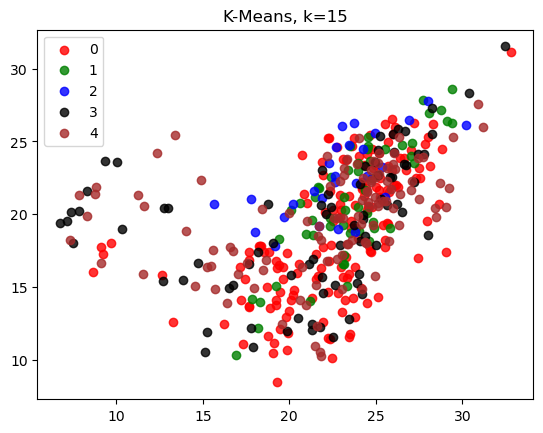

In [84]:
# Visualize Kmeans results
target_class = np.unique(features_df["class"])
colors = ["red", "green", "blue", "black", "brown"]

for color, i, target_class in zip(colors, [0,1,2,3,4], target_class):
    plt.scatter(kmeans_transform[features_df["class"] == i, 0],
        kmeans_transform[features_df["class"] == i, 1],
        alpha=.8, color=color, label=target_class)

# Add legend
plt.title("K-Means, k=15")
plt.legend(loc="best")
plt.show()

In [89]:
# HIERARCHICAL CLUSTERING
hierarch_clf = AgglomerativeClustering(n_clusters=10).fit(features_df[col_names])
hierarch_labels = hierarch_clf.labels_
hierarch_unique, hierarch_counts = np.unique(hierarch_labels, return_counts=True)
print(dict(zip(hierarch_unique, hierarch_counts)))

{0: 43, 1: 94, 2: 53, 3: 42, 4: 43, 5: 44, 6: 23, 7: 24, 8: 30, 9: 31}


In [165]:
# CORRELATION BETWEEN FEATURES
n_features=1024
subset_colindex = np.arange(n_features)

# Initialize array that will be used to store feature correlations
correl_array = np.zeros((n_features, n_features))

for i0,i1 in itertools.combinations(subset_colindex,2):
    f0 = col_names[i0]
    f1 = col_names[i1]
    # Compute correlation
    correl = stats.spearmanr(features_df[f0], features_df[f1])
    # Build matrix
    correl_array[i0, i1] = correl[0]
    correl_array[i1, i0] = correl[0]

# Get least correlated feature
correl_array = np.abs(correl_array)
net_correl = np.sum(correl_array, axis=1)
min_correl = np.argsort(net_correl)
print(min_correl[:20])



[677 942 828 750 983 981 785 649 819 946 731 755 833 722 615 870 574 834
 777 865]


In [167]:
# Export correlation array to csv
np.savetxt("outputs/feature_correl.csv", correl_array, delimiter=",")

### Evaluating Model Performance Section

1. Train and evaluate on 70/30 train/test split with and without preprocessing steps
2. Train and evaluate on 70/30 stratified train/test split with and without preprocessing steps


In [210]:
# 1a) 70/30 train/test split, no preprocessing
# Create linear SVM classifier
svm_clf = SVC(kernel="linear", C=1)

# Train the SVM model using the clf
svm1 = svm_clf.fit(X_train1, y_train1)

# Calculate f1 score
y_pred1 = svm1.predict(X_test1)
f1_score1 = f1_score(y_test1, y_pred1, average='weighted')
print(f"F1 score after 70/30 split, no processing, is: {f1_score1:.3f}")

Accuracy for linear SVM is: 0.414


In [216]:
# 1b) 70/30 train/test split, after correlation preprocessing
subset_names = [col_names[i] for i in min_correl[:20]]
svm2 = svm_clf.fit(features_df[subset_names], features_df["class"])

# Calculate accuracy
y_pred2 = svm2.predict(X_test1[subset_names])
f1_score2 = f1_score(y_test1, y_pred2, average='weighted')
print(f"F1 score for 70/30 split after correlation preprocessing is: {f1_score2:.3f}")


F1 score for 70/30 split after correlation preprocessing is: 0.319


In [218]:
# 1c) 70/30 train/test split, after LDA
svm_clf = SVC(C=1, kernel="rbf")
svm_model = svm_clf.fit(lda_transform, features_df["class"])

# Calculate accuracy
X_test_lda = lda_model.transform(X_test1)
y_hat = svm_model.predict(X_test_lda)
acc = np.average(y_hat == y_test1)
print(f"Accuracy for linear SVM is: {acc:.3f}")

c:\Users\heath\anaconda3\envs\pattern-classification\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[4 4 4 0 0 3 0 0 0 4 1 3 0 1 4 4 3 4 0 0 0 1 4 3 4 3 0 4 1 4 2 3 3 2 0 4 4
 4 3 3 2 4 1 1 3 3 1 4 0 4 3 3 4 0 0 0 3 4 3 3 4 4 4 3 3 4 1 4 0 4 0 4 2 4
 4 2 3 1 0 0 3 0 0 0 4 4 3 0 0 2 3 3 4 0 1 0 4 1 0 1 0 3 0 3 1 0 1 1 0 2 2
 0 0 4 4 3 4 1 0 1 0 4 2 0 0 4 4 0 1].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [225]:
#5. Try training classifier with cross-fold validation
# Use cross_validate from sklearn to obtain accuracies for 5-fold cross validation
cv_results = cross_validate(svm_clf, features_df[col_names], features_df["class"], cv=5,
    scoring='f1_weighted')

# Print accuracy for each fold
for i in range(0,5):
    print(f"The accuracy for fold {i} is: {cv_results['test_score'][i]:.3f}")

# Print average accuracy across all five folds
svm_avg = np.average(cv_results['test_score'])
print(f"The averge accuracy across all five folds is: {svm_avg:.3f}")

# Print standard deviation across five accuracy measurements
svm_std = np.std(cv_results['test_score'])
print(f"The standard deviation across the five accuracy measurements is: {svm_std:.3f}")

The accuracy for fold 0 is: 0.456
The accuracy for fold 1 is: 0.464
The accuracy for fold 2 is: 0.401
The accuracy for fold 3 is: 0.495
The accuracy for fold 4 is: 0.472
The averge accuracy across all five folds is: 0.458
The standard deviation across the five accuracy measurements is: 0.031
